In [10]:
train_data_path = 'D:/main project/Face Mask Detection System/Dataset'
generate_data = 'D:/main project/Face Mask Detection System/Dataset'
data = 'D:/main project/Face Mask Detection System/Dataset'

In [11]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, classification_report
import cv2
import seaborn as sns

In [12]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                                                                                   
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.2, 
                                                           horizontal_flip=True,
                                                           validation_split = 0.02
                                                            )

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,
                                                           validation_split = 0.2
                                                           )

In [13]:
train_data = train_gen.flow_from_directory(train_data_path ,
                                           target_size = (150,150),
                                           class_mode = "categorical",
                                           seed = 42,
                                           subset = "training"
                                           )

test_data = test_gen.flow_from_directory(train_data_path  ,
                                         target_size = (150,150),
                                         class_mode = "categorical",
                                         seed = 42,
                                         subset = "validation"
                                         )

Found 8805 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


In [14]:
labels = list(train_data.class_indices.keys())

labels

['1with_mask', '2without_mask', '3mask_weared_incorrect']

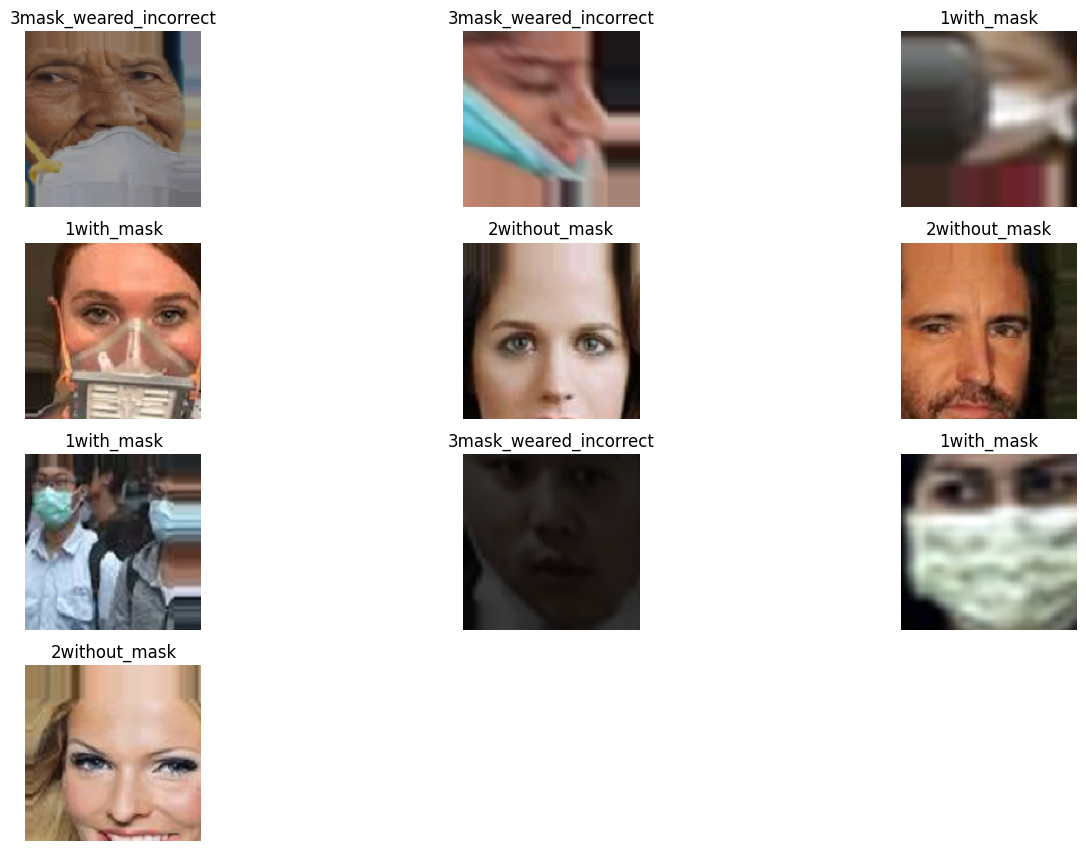

In [15]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize = (16,16))

for i in range(10):
  image,label = train_data.next()

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(labels[tf.argmax(label[i])])
  plt.axis("off")

In [7]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import os
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(256, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation="softmax")
])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"])

In [10]:
x= model.fit(train_data,
          epochs = 10,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/10
276/276 [==============================] - 109s 393ms/step - loss: 0.7071 - accuracy: 0.6990 - val_loss: 0.3446 - val_accuracy: 0.8579
Epoch 2/10
276/276 [==============================] - 107s 387ms/step - loss: 0.4869 - accuracy: 0.8214 - val_loss: 0.3470 - val_accuracy: 0.8584
Epoch 3/10
276/276 [==============================] - 102s 369ms/step - loss: 0.4482 - accuracy: 0.8330 - val_loss: 0.3277 - val_accuracy: 0.8679
Epoch 4/10
276/276 [==============================] - 102s 370ms/step - loss: 0.4065 - accuracy: 0.8482 - val_loss: 0.2825 - val_accuracy: 0.8952
Epoch 5/10
276/276 [==============================] - 103s 373ms/step - loss: 0.3840 - accuracy: 0.8611 - val_loss: 0.3336 - val_accuracy: 0.8701
Epoch 6/10
276/276 [==============================] - 102s 371ms/step - loss: 0.3443 - accuracy: 0.8784 - val_loss: 0.2058 - val_accuracy: 0.9409
Epoch 7/10
276/276 [==============================] - 101s 367ms/step - loss: 0.3154 - accuracy: 0.8907 - val_loss: 0.1645 -

In [10]:
x= model.fit(train_data,
          epochs = 50,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/50
276/276 [==============================] - 106s 379ms/step - loss: 0.6832 - accuracy: 0.7132 - val_loss: 0.4168 - val_accuracy: 0.8077
Epoch 2/50
276/276 [==============================] - 101s 366ms/step - loss: 0.5050 - accuracy: 0.8128 - val_loss: 0.5149 - val_accuracy: 0.8094
Epoch 3/50
276/276 [==============================] - 101s 366ms/step - loss: 0.4387 - accuracy: 0.8359 - val_loss: 0.2689 - val_accuracy: 0.9069
Epoch 4/50
276/276 [==============================] - 101s 366ms/step - loss: 0.3653 - accuracy: 0.8713 - val_loss: 0.2328 - val_accuracy: 0.9119
Epoch 5/50
276/276 [==============================] - 101s 366ms/step - loss: 0.3342 - accuracy: 0.8850 - val_loss: 0.2119 - val_accuracy: 0.9214
Epoch 6/50
276/276 [==============================] - 101s 367ms/step - loss: 0.3035 - accuracy: 0.8960 - val_loss: 0.2406 - val_accuracy: 0.9080
Epoch 7/50
276/276 [==============================] - 101s 366ms/step - loss: 0.2509 - accuracy: 0.9160 - val_loss: 0.1630 -

In [11]:
# from tensorflow.keras.models import load_model
# model.save("Datasetfinal.h5")

In [16]:
from tensorflow import keras

model_deploy = keras.models.load_model('Datasetfinal.h5')

In [17]:
model_evaluation = model_deploy.evaluate(train_data)

276/276 [==============================] - 83s 297ms/step - loss: 0.0349 - accuracy: 0.9897


In [18]:
print(f"Model Accuracy: {model_evaluation[1] * 100 : 0.2f} %")

Model Accuracy:  98.97 %


1/1 [==============================] - 0s 130ms/step


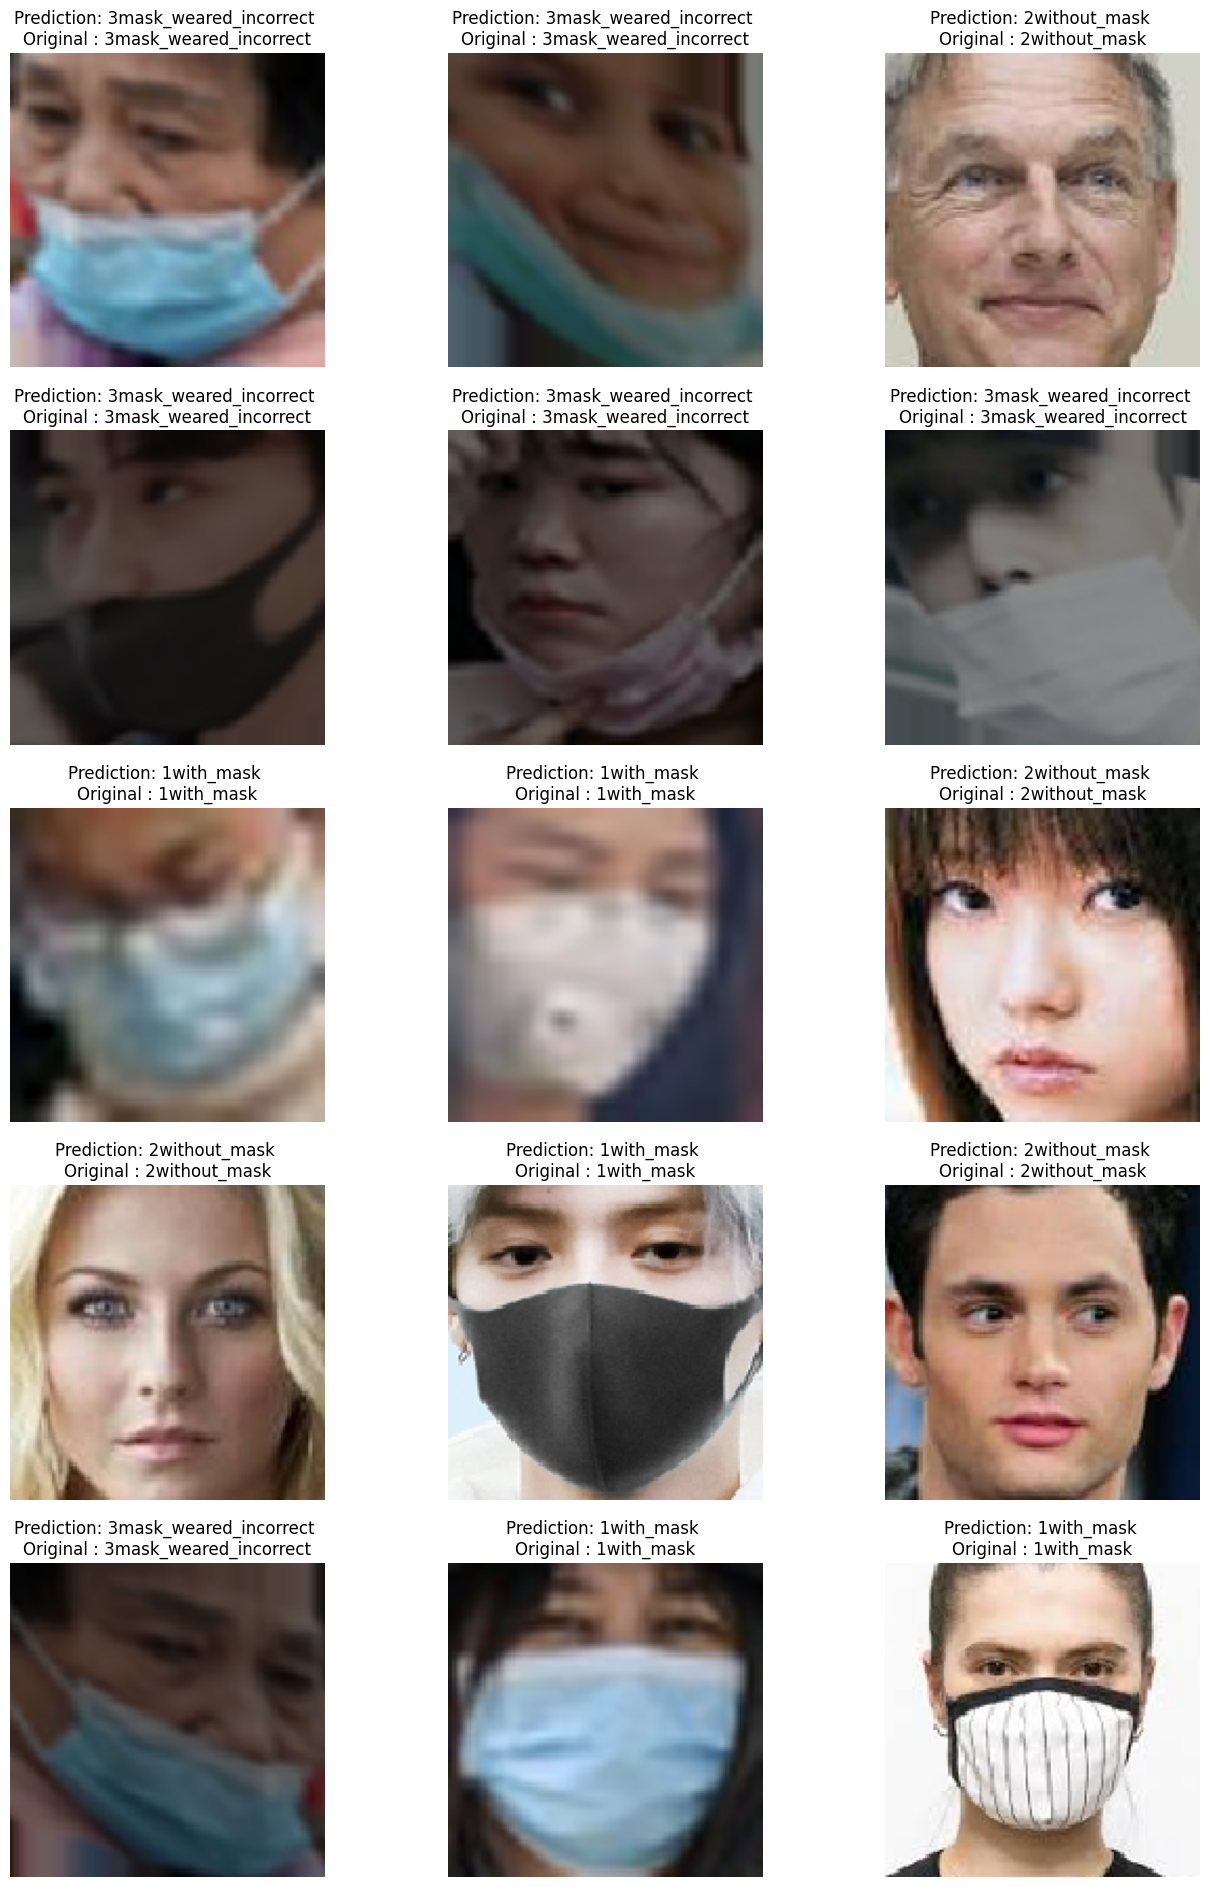

In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))

for i in range(len(test_data)):
    image, label = test_data.next()
    model_pred = model_deploy.predict(image)
    plt.subplot(5,3, i+1)
    plt.imshow(image[i])
    plt.title(f"Prediction: {labels[tf.argmax(model_pred[i])]} \nOriginal : {labels[tf.argmax(label[i])]}")
    plt.subplots_adjust(top=1.25)
    plt.axis("off")
    
    if i == 14:
        break

In [ ]:
plt.plot(x.history['loss'], label='train loss')
plt.plot(x.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

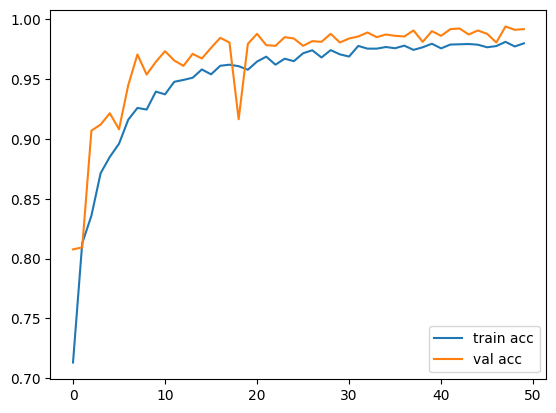

datetime.datetime(2023, 3, 17, 22, 20, 31, 611681)

<Figure size 640x480 with 0 Axes>

In [41]:
import datetime

plt.plot(x.history['accuracy'], label='train acc')
plt.plot(x.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
 
datetime.datetime.now()

In [ ]:
# from keras.utils import img_to_array
# from keras.utils.image_utils import load_img
# import matplotlib.pyplot as plt
# import tensorflow as tf

# #data = "/content/drive/MyDrive/generated data sets/without mask/WhatsApp Image 2022-11-10 at 9.04.59 PM (1).jpeg"
# #data = "/content/drive/MyDrive/generated data sets/with mask/02.jpeg"
# # data = 'D:/a12324/New folder/Dataset/2without_mask/1.png'
# data = 'D:/a12324/4.jpg'
# # data = 'D:/a12324/New folder/Dataset/3mask_weared_incorrect/3.png'

# # Define the classes
# classes = ['With Mask', 'Without Mask','Incorrect Wear']

# # Load the image to be tested
# # image = cv2.imread('D:/a12324/New folder/Dataset/3mask_weared_incorrect/2.png')
# # image = cv2.imread('D:/a12324/New folder/Dataset/2without_mask/1.png')
# image = cv2.imread(data)
# image = cv2.resize(image, (150, 150))
# image = np.expand_dims(image, axis=0)

# # Preprocess the image
# image = image.astype('float32') / 255.0

# # Use the model to make predictions on the image
# predictions = model_deploy.predict(image)


# # Print the probability of each class
# for i in range(len(classes)):
#     print(classes[i] + ': ' + str(predictions[0][i]))

# with_mask=predictions[0][0]
# without_mask=predictions[0][1]
# incorrect_wear=predictions[0][2] 


# print(with_mask)
# print(without_mask)
# print(incorrect_wear)



1/1 [==============================] - 0s 19ms/step
[[1. 0. 0.]]


(-0.5, 149.5, 149.5, -0.5)

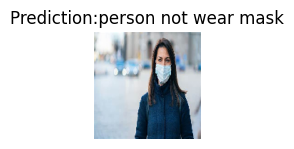

In [13]:
# if 0.6<with_mask<0.9:
#     # print("person wear mask")
#     ans="person wear mask"
# elif without_mask>0.6:
#     # print("person not wear mask")
#     ans="person not wear mask"
# else :
#     # print("mask not wear correct");
#     ans="incorrect mask wear"

# labels = []
# plt.figure(figsize=(8,8))
# print(test_data)
# # for i in range(len(test_data)):
# image = load_img(data,target_size=(150,150))
# # plt.imshow(image)
# image_arr = img_to_array(image)
# image_arr = np.array([image_arr])
# #print(image.shape)
# model_pred = model_deploy.predict(image_arr)
# print(model_pred)
# i = model_pred.argmax()
# plt.subplot(5,5,i+1)
# plt.imshow(image)
# plt.title(f"Prediction:{str}")
# plt.subplots_adjust(top= 1.25)
# plt.axis("off")

